# Делаем скриншоты веб-страниц в R

Пакет **webshot** позволяет делать скриншоты веб-страниц напрямую из R/RStudio. Также есть возможность делать скриншоты shiny приложений (**appshot()**) и RMarkdown документов (**rmdshot()**). 

Устанавливаем с помощью стандартной команды **install.packages("webshot")**. Также для работы пакета требуется установка **PhantomJS**. Ставим командой **webshot::install_phantomjs()**. 

Подгружаем библиотеку.

In [27]:
library(webshot)

В пакете основная функция - это webshot. Она требует на вход один обязательный параметр - URL, по умолчанию сохраняет изображение с названием webshot.png. Если дефолтное название изображения не нравится, то необходимо указывать его в параметре *file*. По умолчанию все изображения сохраняются с размером 992х744.

Посмотрим на параметры. Они все доступны по справке.

webshot(url = NULL, file = "webshot.png", vwidth = 992,
  vheight = 744, cliprect = NULL, selector = NULL, expand = NULL,
  delay = 0.2, zoom = 1, eval = NULL, debug = FALSE,
  useragent = NULL)

Параметр **vwidth** отвечает за ширину области просмотра (это ширина окна браузера), **vheight** - за высоту, **cliprect** - это прямоугольник отсечения и отвечает за обрезку изображения (опция несовместима с параметром selector), параметр **selector** - это CSS селектор, параметр **expand** отвечает за то, насколько пикселей нужно расширить прямоугольник отсечения, параметр **delay** отражает время задержки перед тем, как сделать скриншот (например, если страница подгружается), параметр **zoom** - это коэффициент масштабирования, который увеличивает или уменьшает количество пикселей по вертикали или горизонтали, **eval** - это необязательная строка с кодом на JavaScript, которая будет оцениваться после открытия браузера и ожидания задержки, но перед вычислением области отсечения и созданием снимака экрана (здесь нужно смотреть документацию), **debug** - распечатывает отладочные сообщения из PhantomJS и CasperJS, **useragent** - заголовок User-Agent, используемый для запроса URL-адреса, то есть это http-заголовок, указывающий на то, что для разных пользователей предоставляется разный контент, позволяет избегать проблем с рендерингом некотрых веб-сайтов.

Посмотрим, как работает функция. Сделаем скриншот с сайта https://www.hbo.com/ и сохраним его в файл hbo.png.

In [28]:
webshot(url = "https://www.hbo.com/", file = "hbo.png")
# можно сохранять также в pdf
# webshot("https://www.hbo.com/", file = "hbo.pdf")

Для того, чтобы открыть изображение, воспользуемся пакетом **magick**. Для своей работы он требует установки в операционную систему **ImageMagick**.

In [29]:
library(magick, quietly = TRUE)
hbo <- image_read("hbo.png")
print(hbo)

# A data frame: 0 × 7
# … with 7 variables: format <chr>, width <int>, height <int>,
#   colorspace <chr>, matte <lgl>, filesize <int>, density <chr>


В данном случае у нас сохранилась вся страница. Чтобы сохранить только ту область, которую на данный момент отображает брузер, пропишем следующим образом.

In [30]:
webshot(url = "https://www.hbo.com/", 
        file = "hbo.png", 
        cliprect = "viewport")

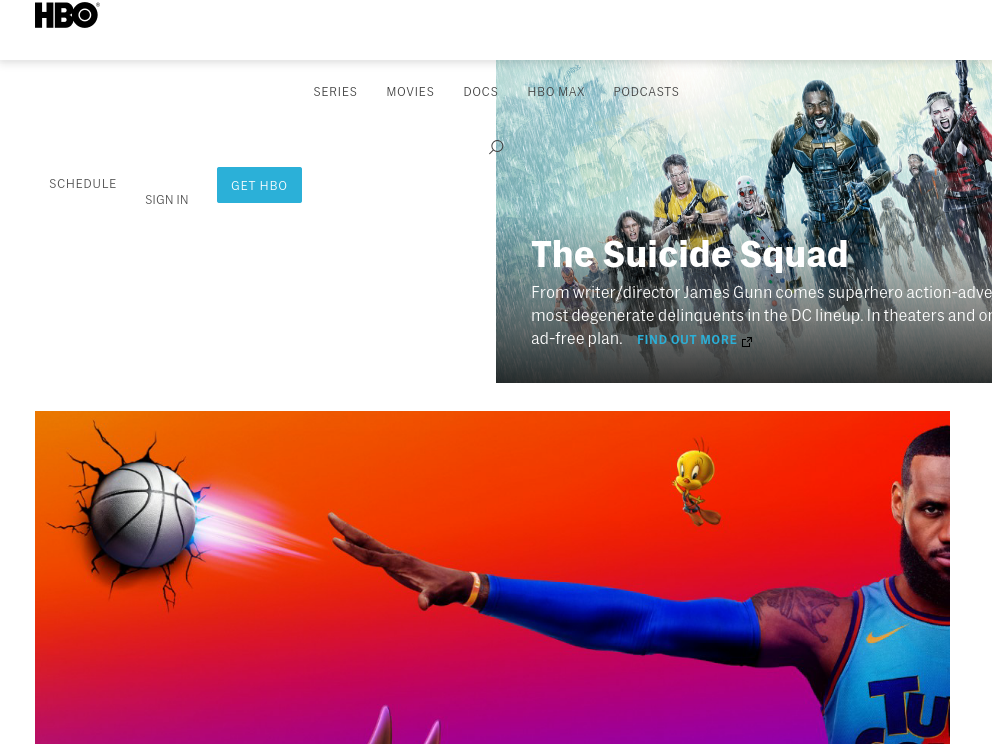

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      992    744 sRGB       TRUE    646822 28x28  


In [31]:
print(image_read("hbo.png"))

Используем селекторы.

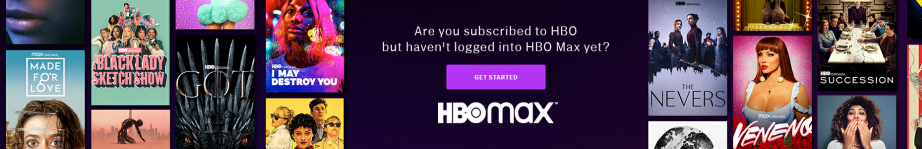

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      922    149 sRGB       TRUE    245043 28x28  


In [32]:
webshot(url = "https://www.hbo.com/", 
        file = "hbo.png", 
        selector = ".image-click-container")
print(image_read("hbo.png"))

Используем селекторы и расширяем прямоугольник отсечения.

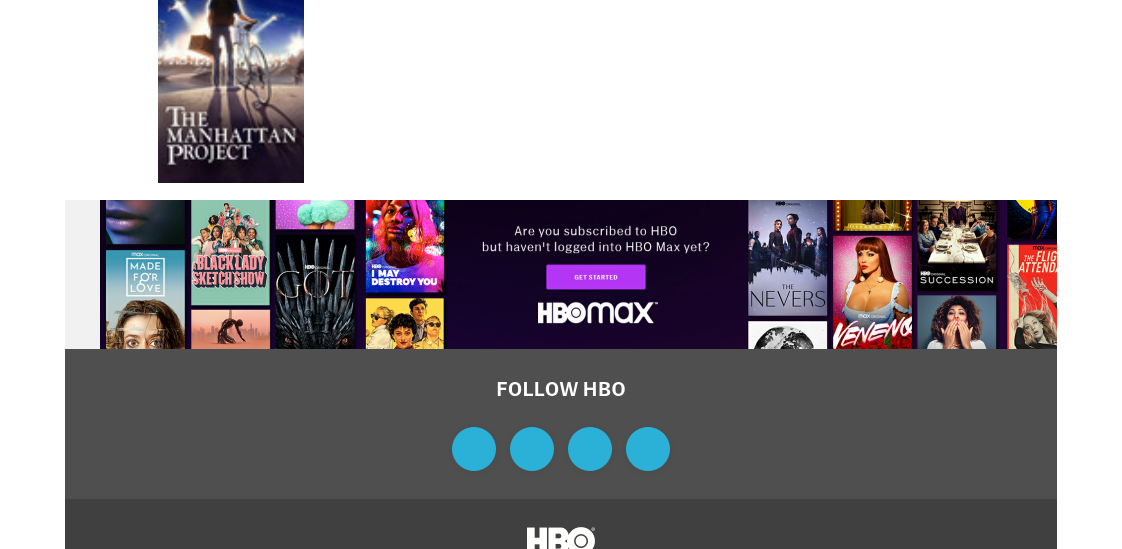

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG     1122    549 sRGB       TRUE    325120 28x28  


In [34]:
webshot(url = "https://www.hbo.com/", 
        file = "hbo.png", 
        selector = ".image-click-container", 
        expand = c(200, 100, 200, 100))
print(image_read("hbo.png"))

Теперь посмотрим на параметр zoom, уменьшим изображение.

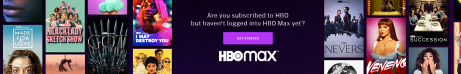

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      461     74 sRGB       TRUE     67710 28x28  


In [35]:
webshot(url = "https://www.hbo.com/", 
        file = "hbo.png", 
        selector = ".image-click-container", 
        zoom = 0.5)
print(image_read("hbo.png"))

Отметим, что функция webshot() векторизована, то есть может принимать вектор url-адресов и сохранять сразу несколько изображений (векторы должны быть равной длины).

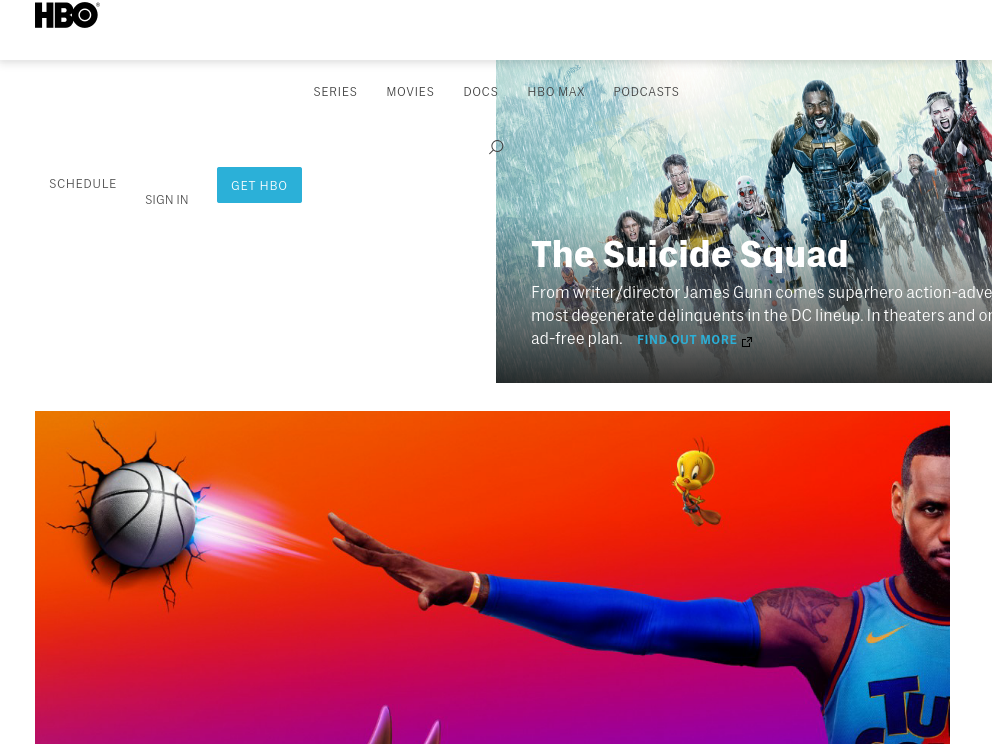

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      992    744 sRGB       TRUE    646822 28x28  


In [36]:
webshot(c("https://www.hbo.com/", "https://www.lostfilm.tv/"),
        file = c("hbo.png", "lostfilm.png"), 
        cliprect = "viewport")
print(image_read("hbo.png"))

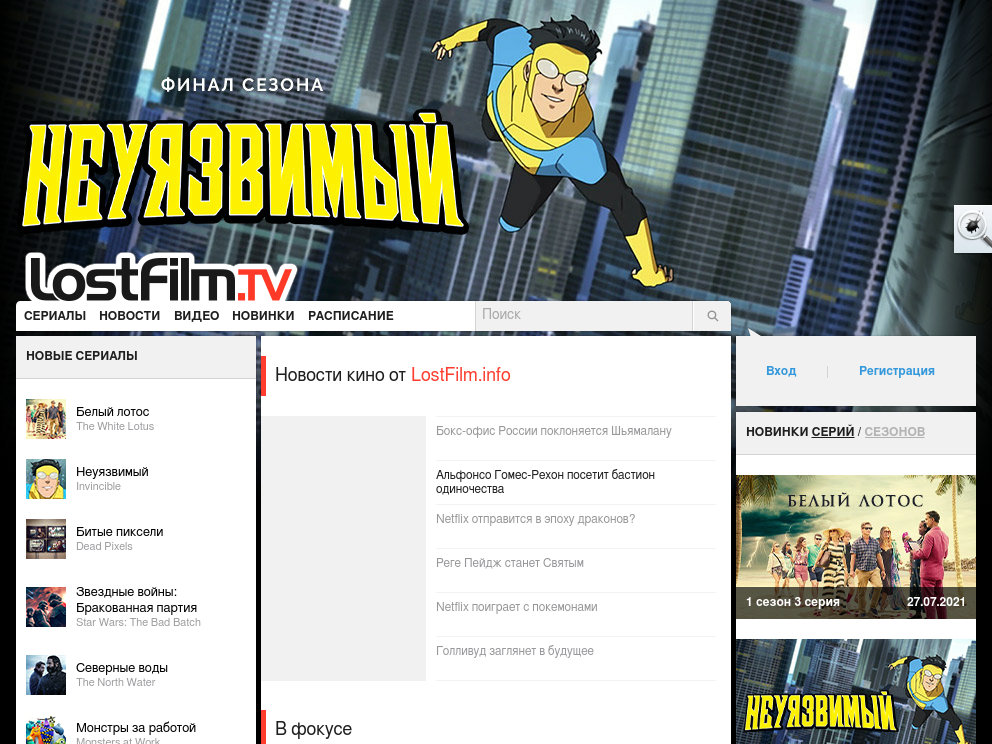

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      992    744 sRGB       TRUE    771812 28x28  


In [37]:
print(image_read("lostfilm.png"))

Либо можно сохранить изображение в несколько файлов разных форматов.

In [38]:
webshot("https://www.lostfilm.tv/", file = c("lost.png", "lost.pdf"))

Если нужно изменить размеры изображения, то можно изменить их в процессе создания скриншота через параметры vwidth и vheight.

In [50]:
webshot(url = "https://www.hbo.com/",
        vwidth = 850, 
        vheight = 700,
        file = "hbo.png", 
        cliprect = "viewport")

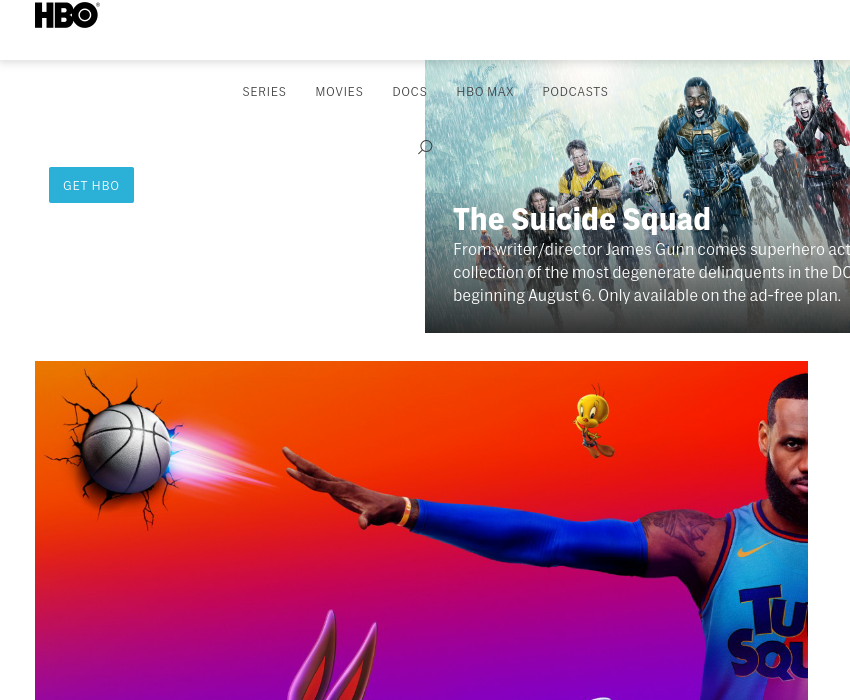

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      850    700 sRGB       TRUE    530544 28x28  


In [51]:
print(image_read("hbo.png"))

Если же скриншот сделан, возможности его сделать во второй раз уже нет, то можно манипулировать размером изображения через ImageMagick (функция resize()) и  OptiPNG (функция shrink()).

Более подробно:

https://github.com/wch/webshot

https://wch.github.io/webshot/articles/intro.html